<h3 style="color:#ff6600">- make_classification()</h3>

설정에 따른 분류용 가상 데이터를 생성하는 명령

- 인수: 
    - <b style="background:yellow;">n_samples</b>: 표본 데이터의 수 (default=100)
    - <b style="background:yellow;">n_features</b>: 독립변수의 수 (default=20)
    - <b>n_informative</b>: 독립변수 중 종속변수와 상관 관계가 있는 성분의 수 (default=2) 
    - <b>n_redundant</b>: 독립변수 중 다른 독립변수의 선형 조합으로 나타나는 성분의 수 (default=2)
    - <b>n_repeated</b>: 독립변수 중 단순 중복된 성분의 수 (default=0)
    - <b style="background:yellow;">n_classes</b>:종속변수의 클래스 수 (default=2)
    - <b>n_clusters_per_class</b>: 클래스 당 클러스터의 수 (default=2)
    - <b>weights</b>: 각 클래스에 할당된 표본 수 
    - <b>random_state</b>: 난수 발생 시드


- 반환값:
    - X: [n_samples, n_features] 크기의 배열. 독립변수
    - y: [n_samples] 크기의 배열. 종속변수

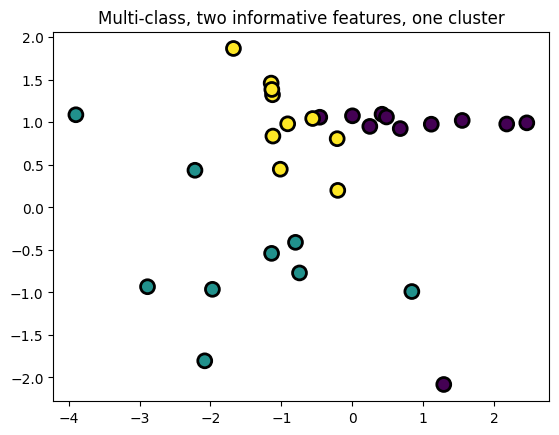

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=123)
# 30행 2열 기준

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.show()

# c=y에서 c는 컬러로 각 데이터에 대해 y배열(리스트) 사용

In [4]:
X

array([[ 1.29132001e+00, -2.08326854e+00],
       [ 6.77549475e-01,  9.26384821e-01],
       [ 2.48340554e-01,  9.52077814e-01],
       [-2.21845307e+00,  4.36127336e-01],
       [-3.89815464e+00,  1.08900681e+00],
       [-2.08047819e+00, -1.80500918e+00],
       [ 1.11551507e+00,  9.77966364e-01],
       [-2.03825266e-01,  1.99599447e-01],
       [ 4.20717667e-01,  1.09514457e+00],
       [-4.57603353e-01,  1.05983225e+00],
       [-1.97211346e+00, -9.64075686e-01],
       [-1.67550987e+00,  1.86857896e+00],
       [-2.12238400e-01,  8.07515472e-01],
       [-8.00298785e-01, -4.11599826e-01],
       [ 8.41133443e-01, -9.90142060e-01],
       [ 4.83051054e-01,  1.06304175e+00],
       [-1.13741082e+00, -5.41305979e-01],
       [-1.14353330e+00,  1.46133635e+00],
       [ 2.17961549e+00,  9.80184581e-01],
       [-1.12464234e+00,  1.32419911e+00],
       [-2.88766940e+00, -9.33535364e-01],
       [ 1.55162558e+00,  1.02220600e+00],
       [-5.57680211e-01,  1.04487404e+00],
       [-1.

In [2]:
X.shape

(30, 2)

In [3]:
y

array([0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 0, 2])

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init="random")   # 초기 점 위치 random으로 잡아줌
model.fit(X)

KMeans(init='random', n_clusters=3)

In [7]:
model.cluster_centers_
# 초기 중심점 좌표의 위치 => 클러스터를 3개 선언해줬으므로 좌표값도 3개 나옴

array([[-0.55984665,  1.04057827],
       [ 1.44565173,  0.2610318 ],
       [-1.96728067, -0.48772003]])

In [9]:
pred = model.predict(X)
pred

array([1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 0])

#### - 모델을 이용해 클러스터링 된 결과를 산점도를 이용해 표시

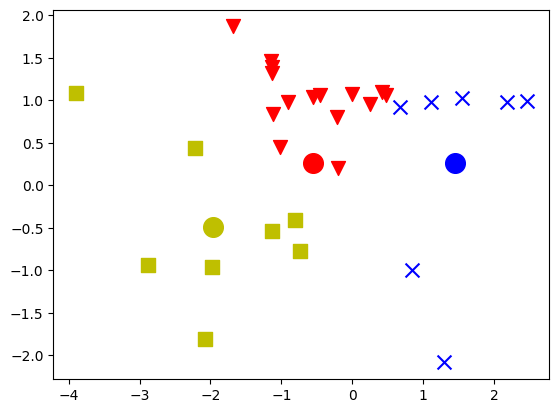

In [26]:
c0, c1, c2 = model.cluster_centers_

plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=100, marker="v", c="r")   # 첫번째 클러스터 데이터를 위한 산점도
plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=100, marker="x", c="b")   # 두번째 클러스터 데이터를 위한 산점도
plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=100, marker="s", c="y")   # 세번째 클러스터 데이터를 위한 산점도

plt.scatter(c0[0], c1[1], s=200, c="r")   # 첫번째 클러스터의 중심값
plt.scatter(c1[0], c1[1], s=200, c="b")   # 두번째 클러스터의 중심값
plt.scatter(c2[0], c2[1], s=200, c="y")   # 세번째 클러스터의 중심값

plt.show()

#### - X데이터와 중심점 사이의 거리 측정 값, 클러스터링을 통해 할당된 레이블을 하나의 데이터프레임으로 만들어 출력

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.hstack([X, np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                            np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
                            np.linalg.norm(X - c2, axis=1)[:, np.newaxis],
                            model.labels_[:, np.newaxis]]), columns=["x0", "x1", "d0", "d1", "d2", "class"])

df

# hstack => 좌-우로 각각의 데이터 결합 (cf.아래위 => vstack)
# X: 독립변수 데이터
# ord값이 없으므로 L2 norm으로 계산된 방식

,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,3.631148,2.349375,3.628258,1.0
1,0.677549,0.926385,1.242654,1.016207,2.999136,1.0
2,0.248341,0.952078,0.813018,1.382425,2.642347,0.0
3,-2.218453,0.436127,1.765315,3.668286,0.957383,2.0
4,-3.898155,1.089007,3.338659,5.407570,2.492858,2.0
5,-2.080478,-1.805009,3.226405,4.086822,1.322144,2.0
6,1.115515,0.977966,1.676531,0.789294,3.413483,1.0
7,-0.203825,0.199599,0.913234,1.650621,1.892666,0.0
8,0.420718,1.095145,0.982081,1.321451,2.864960,0.0
9,-0.457603,1.059832,0.104040,2.064089,2.161954,0.0


---
### norm 예시

In [17]:
import numpy as np

x = np.random.randint(low=1, high=10, size=(3, 3))
print(x)
print("---------------------------------------------")

L1_norm = np.linalg.norm(x, axis=1, ord=1)   # ord=1은 L1 norm
print(L1_norm)
print("shape:", L1_norm.shape)
print("---------------------------------------------")

L2_norm = np.linalg.norm(x, axis=1, ord=2)   # ord=2는 L2 norm (default)
print(L2_norm)
print("shape:", L2_norm.shape)

[[5 1 9]
 [8 5 5]
 [5 3 1]]
---------------------------------------------
[15. 18.  9.]
shape: (3,)
---------------------------------------------
[10.34408043 10.67707825  5.91607978]
shape: (3,)


- axis=1일때 계산방향
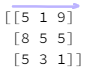


---

#### - 모델과 데이터를 인수로 받아 산점도와 중심점을 출력할 함수

In [24]:
def plot_clusters(model, data):
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=20, marker="v", c="r")
    plt.scatter(data[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=20, marker="x", c="b")    
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=20, marker="s", c="y")    
    
    plt.scatter(c0[0], c0[1], s=40, c="r")
    plt.scatter(c1[0], c1[1], s=40, c="b")    
    plt.scatter(c2[0], c2[1], s=40, c="y")    

#### - KMeans 클래스의 max_iter 인자는 최대 학습 횟수를 지정

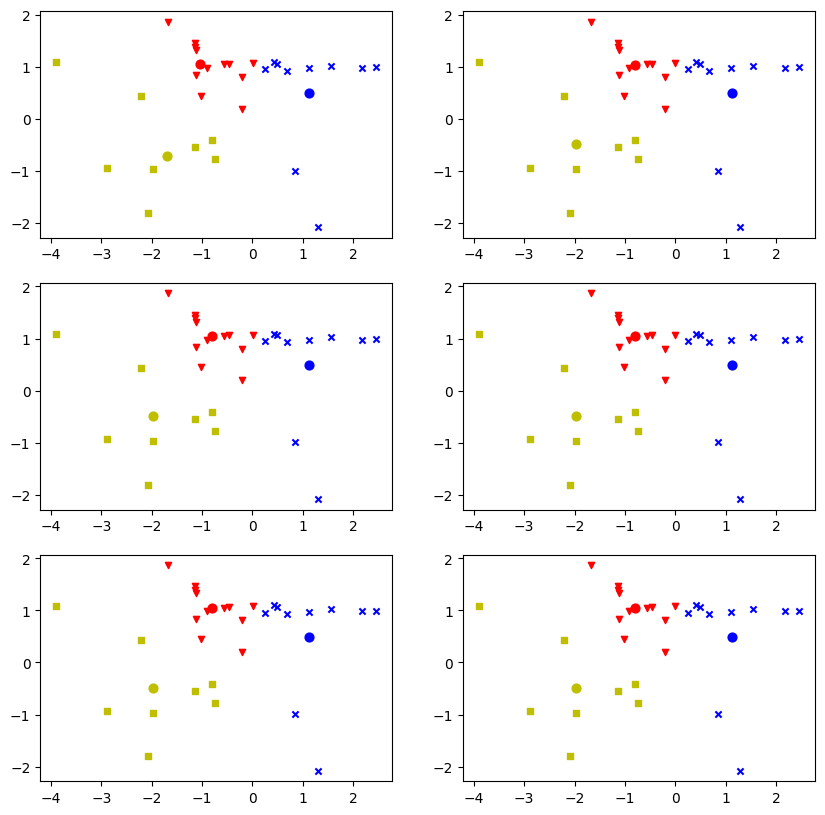

In [25]:
plt.figure(figsize=(10,10))

model1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(3, 2, 1)
plot_clusters(model1, X)

model2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=2, random_state=1)
model2.fit(X)
plt.subplot(3, 2, 2)
plot_clusters(model2, X)

model3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=3, random_state=1)
model3.fit(X)
plt.subplot(3, 2, 3)
plot_clusters(model3, X)

model4 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=4, random_state=1)
model4.fit(X)
plt.subplot(3, 2, 4)
plot_clusters(model4, X)

model5 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=5, random_state=1)
model5.fit(X)
plt.subplot(3, 2, 5)
plot_clusters(model5, X)

model6 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=6, random_state=1)
model6.fit(X)
plt.subplot(3, 2, 6)
plot_clusters(model6, X)

plt.show()

# max_iter: 반복 횟수 지정

## Iris Data를 사용한 K-means Clustering 만들기

In [28]:
import math
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### - 'petal length'와 'petal width' 데이터 2개의 상관관계

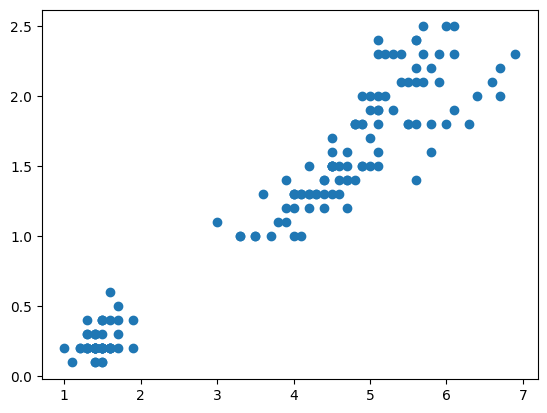

In [29]:
import matplotlib.pyplot as plt

petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:, 0], petals.values[:, 1])
plt.show()

In [47]:
petals

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#### - K=2로 Clustering

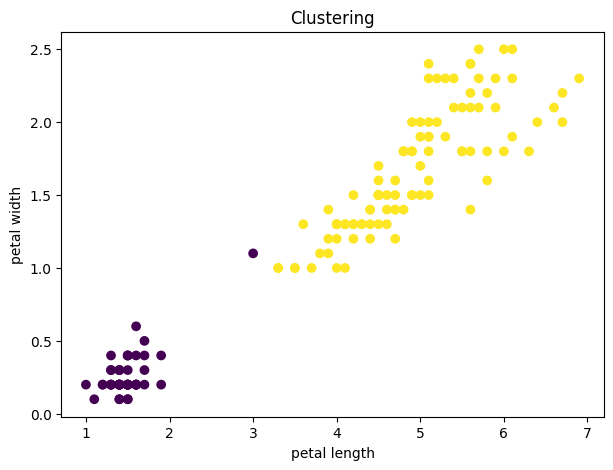

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=20)
km.fit(iris_data_pd.iloc[:, 2:4])
y_pred = km.predict(iris_data_pd.iloc[:, 2:4])

plt.figure(figsize=(7,5))
plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred)
plt.title("Clustering")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [32]:
km.predict(iris_data_pd.iloc[:, 2:4])

# = y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
print(iris_data_pd.iloc[98, 2:4])

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


#### - 각 클러스터 기준값 확인

In [34]:
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

#### - 유클리드 거리 측정

In [38]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2
    result = math.sqrt(squared)
    return result

print("0 cluster distance:", distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print("1 cluster distance:", distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[1][0], km.cluster_centers_[1][1]))

0 cluster distance: 1.7246990164733285
1 cluster distance: 2.0112458036464465


---

## [bmi 실습 Quiz]

### - bmi.csv에서 상위 100개의 데이터를 가지고 클러스터(k=3)를 만들어 출력하시오.

<br>
** 출력 ** <br>
1. height, weight, cluster_id(클러스터 번호) 순으로 출력
2. 산점도 출력 (x=height, y=weight, c=cluster_id)

In [43]:
import pandas as pd

bmi = pd.read_csv("./datasets/bmi.csv")
bmi = bmi.head(100)
bmi

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
95,136,51,fat
96,131,37,normal
97,180,75,normal
98,191,60,thin


In [50]:
bmi.drop(['label'], axis=1, inplace=True)

In [51]:
bmi

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


In [52]:
import matplotlib.pyplot as plt

bmi_data = pd.DataFrame(bmi.values, columns=['height', 'weight'])
bmi_data

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


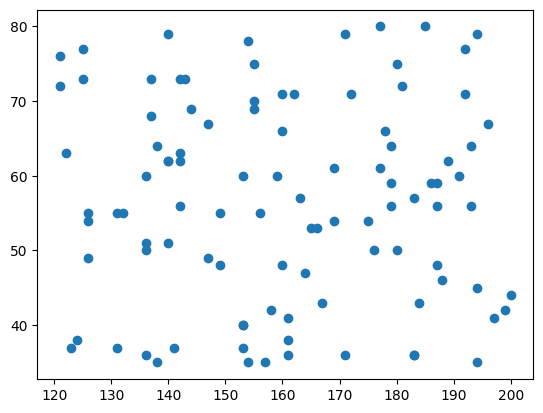

In [53]:
plt.scatter(bmi_data.values[:, 0], bmi_data.values[:, 1])
plt.show()

In [74]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init="random")
model.fit(bmi)
y_pred = model.predict(bmi)
y_pred

array([1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1])

In [68]:
model.cluster_centers_

array([[1.52142857e+02, 4.35357143e+01, 1.42857143e-01],
       [1.39735294e+02, 6.53235294e+01, 8.82352941e-01],
       [1.84710526e+02, 5.82894737e+01, 1.94736842e+00]])

In [69]:
bmi['cluster_id'] = y_pred
bmi

,height,weight,cluster_id
0,142,62,1
1,142,73,1
2,177,61,2
3,187,48,2
4,153,60,1
...,...,...,...
95,136,51,1
96,131,37,0
97,180,75,2
98,191,60,2


In [77]:
model.cluster_centers_

array([[185.13513514,  58.40540541,   2.        ],
       [136.29411765,  62.23529412,   0.88235294],
       [156.75862069,  47.51724138,   0.20689655]])

In [78]:
model.labels_

array([1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1])

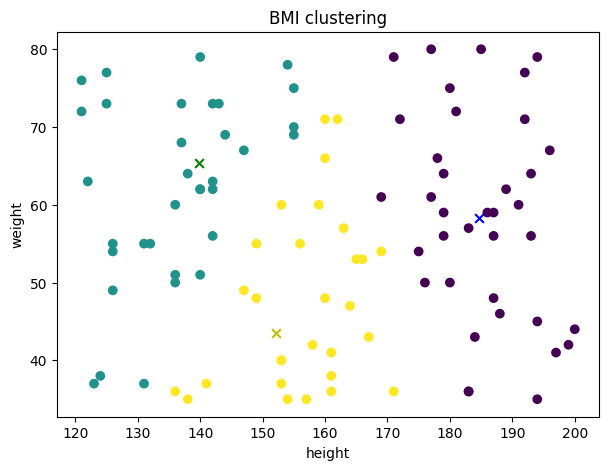

In [81]:
plt.figure(figsize=(7,5))
plt.scatter(bmi['height'], bmi['weight'], c=y_pred)
plt.scatter(c0[0], c0[1], s=40, marker="x", c="y")
plt.scatter(c1[0], c1[1], s=40, marker="x", c="g")
plt.scatter(c2[0], c2[1], s=40, marker="x", c="b")

plt.title("BMI clustering")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

---
### Answer

In [84]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

tbl = pd.read_csv("./datasets/bmi.csv")
tbl

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [83]:
df = tbl.iloc[:100, :-1]
df

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


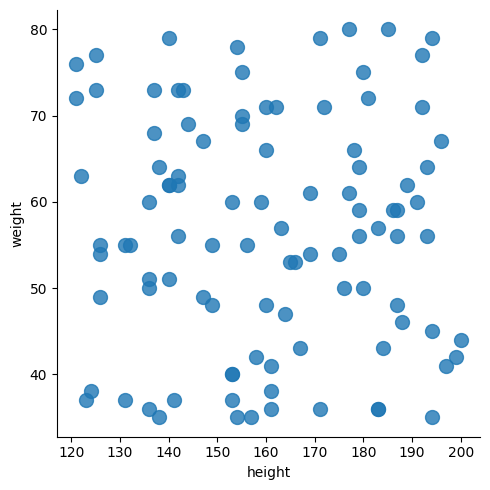

In [87]:
sns.lmplot(x='height', y='weight', data=df, fit_reg=False, scatter_kws={"s": 100})

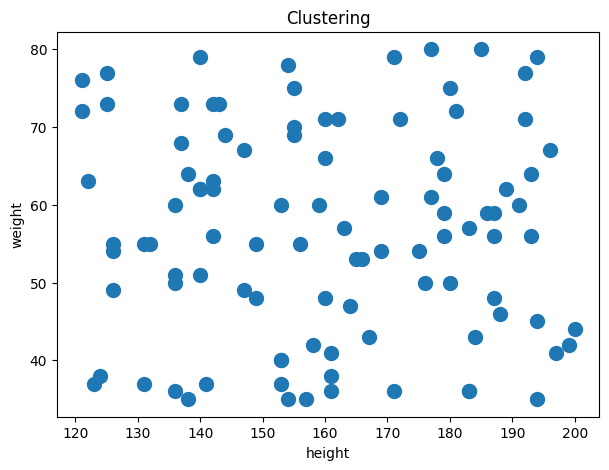

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['height'], df['weight'], s=100)
plt.title("Clustering")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="random").fit(df)
kmeans

KMeans(init='random', n_clusters=3)

In [90]:
kmeans.cluster_centers_

array([[184.71052632,  58.28947368],
       [139.74285714,  64.91428571],
       [152.59259259,  43.25925926]])

In [92]:
kmeans.labels_

array([1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1])

In [93]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,142,62,1
1,142,73,1
2,177,61,0
3,187,48,0
4,153,60,1
...,...,...,...
95,136,51,1
96,131,37,2
97,180,75,0
98,191,60,0


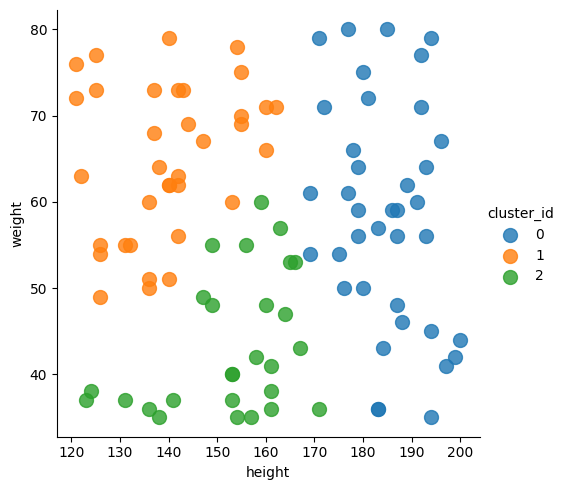

In [94]:
sns.lmplot(x='height', y='weight', hue="cluster_id", data=df, fit_reg=False, scatter_kws={"s": 100})

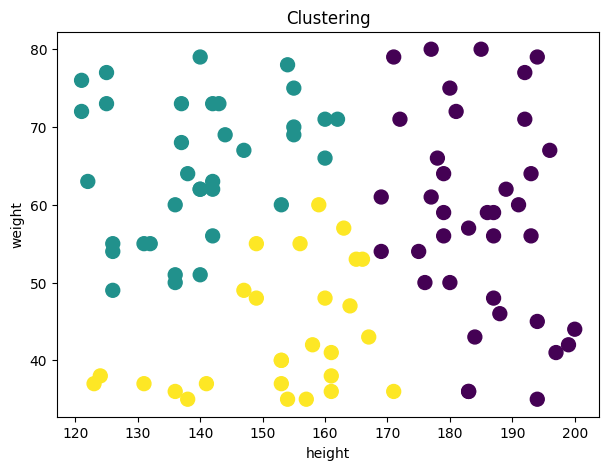

In [95]:
plt.figure(figsize=(7,5))
plt.scatter(df['height'], df['weight'], c=df['cluster_id'], s=100)
plt.title("Clustering")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

#### cf) 전체 데이터일때

In [96]:
bmi_origin = pd.read_csv("./datasets/bmi.csv")
bmi_origin.drop(['label'], axis=1, inplace=True)
bmi_origin

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
19995,122,58
19996,193,69
19997,193,37
19998,195,51


In [97]:
kmeans = KMeans(n_clusters=3, init="random").fit(bmi_origin)
kmeans

KMeans(init='random', n_clusters=3)

In [98]:
bmi_origin['cluster_id'] = kmeans.labels_
bmi_origin

,height,weight,cluster_id
0,142,62,2
1,142,73,2
2,177,61,1
3,187,48,1
4,153,60,0
...,...,...,...
19995,122,58,2
19996,193,69,1
19997,193,37,1
19998,195,51,1


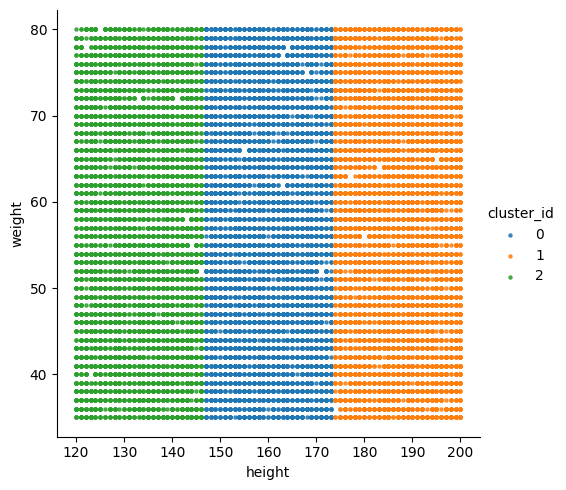

In [105]:
sns.lmplot(x='height', y='weight', hue="cluster_id", data=bmi_origin, fit_reg=False, scatter_kws={"s": 5})